### **Using neural networks to LogAnomaly Detection**

In [4]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import math

n_t, w_idf, weighed_topics = weighing_topics(10)

List with topics-per-log loaded from TopicsPerLog/TPL_10_13082023_(0).pkl


About the data: 

In [5]:
data=weighed_topics
print("Num of vectors: ", len(data))
print("Vector type: ", type(data[0]))

Num of vectors:  2846
Vector type:  <class 'list'>


In [66]:
data

[[0.0,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0.7959342943998912,
  0

#### Data

In [33]:
ds= TplPionier(config=config.ds_medium)
errors_idx=list(ds.index[ds.index['ERROR'] == True].index)

In [76]:
import numpy as np

# Convertir cada lista interna en un array NumPy
arrays_internos = [np.array(sublista) for sublista in data]
data = np.array(arrays_internos, dtype=object)
print(data)


[array([0.        , 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79593429, 0.79593429,
        0.79593429, 0.79593429, 0.79593429, 0.79

In [82]:
etiqueta=np.zeros(len(data))
etiqueta[errors_idx] = 1
etiqueta

array([1., 1., 0., ..., 0., 0., 0.])

In [83]:
data_padded = tf.keras.preprocessing.sequence.pad_sequences(data, padding='post', dtype='float32')

In [94]:
from sklearn.model_selection import train_test_split

data_train, data_test, etiqueta_train, etiqueta_test = train_test_split(data_padded, etiqueta, test_size=0.2, stratify=etiqueta, random_state=42)


In [95]:
# Definir el modelo
model2 = Sequential()
model2.add(LSTM(64, input_shape=(None, 1)))  # None para aceptar tamaños de secuencia variables
model2.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model2.fit(data_train, etiqueta_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model2.evaluate(data_test, etiqueta_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Epoch 1/10
57/57 [==============================] - 45s 770ms/step - loss: 0.2432 - accuracy: 0.9742 - val_loss: 0.1217 - val_accuracy: 0.9737
Epoch 2/10
57/57 [==============================] - 43s 747ms/step - loss: 0.1211 - accuracy: 0.9742 - val_loss: 0.1218 - val_accuracy: 0.9737
Epoch 3/10
57/57 [==============================] - 43s 749ms/step - loss: 0.1229 - accuracy: 0.9742 - val_loss: 0.1217 - val_accuracy: 0.9737
Epoch 4/10
57/57 [==============================] - 44s 765ms/step - loss: 0.1216 - accuracy: 0.9742 - val_loss: 0.1228 - val_accuracy: 0.9737
Epoch 5/10
57/57 [==============================] - 44s 776ms/step - loss: 0.1205 - accuracy: 0.9742 - val_loss: 0.1235 - val_accuracy: 0.9737
Epoch 6/10
57/57 [==============================] - 85s 2s/step - loss: 0.1220 - accuracy: 0.9742 - val_loss: 0.1220 - val_accuracy: 0.9737
Epoch 7/10
57/57 [==============================] - 102s 2s/step - loss: 0.1205 - accuracy: 0.9742 - val_loss: 0.1219 - val_accuracy: 0.9737
Epoc

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generar datos de ejemplo
np.random.seed(42)
num_samples = 2800
max_vector_length = 10  # Longitud máxima de los vectores
error_percentage = 0.03

# Crear datos de ejemplo
X = [np.random.rand(np.random.randint(1, max_vector_length + 1)) for _ in range(num_samples)]
y = np.random.choice([0, 1], size=num_samples, p=[1 - error_percentage, error_percentage])

# Preprocesar datos
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', dtype='float32')

# Dividir datos en conjunto de entrenamiento y conjunto de prueba
split = int(0.8 * num_samples)
X_train, X_test = X_padded[:split], X_padded[split:]
y_train, y_test = y[:split], y[split:]

# Definir el modelo
model = Sequential()
model.add(LSTM(64, input_shape=(None, 1)))  # None para aceptar tamaños de secuencia variables
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Hacer predicciones con el modelo
example_vector = np.random.rand(np.random.randint(1, max_vector_length + 1))
example_vector_padded = np.expand_dims(tf.keras.preprocessing.sequence.pad_sequences([example_vector], padding='post', dtype='float32'), axis=-1)
prediction = model.predict(example_vector_padded)
predicted_class = 1 if prediction[0, 0] > 0.5 else 0

# Imprimir resultados
print("Ejemplo de vector:")
print(example_vector)
print("Ejemplo de vector padded: ")
print(example_vector_padded)
print("Predicción de la red:")
print(prediction)
print("Clase predicha:", predicted_class)


Epoch 1/10
56/56 [==============================] - 2s 12ms/step - loss: 0.2843 - accuracy: 0.9710 - val_loss: 0.1558 - val_accuracy: 0.9665
Epoch 2/10
56/56 [==============================] - 0s 6ms/step - loss: 0.1314 - accuracy: 0.9710 - val_loss: 0.1525 - val_accuracy: 0.9665
Epoch 3/10
56/56 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 0.9710 - val_loss: 0.1469 - val_accuracy: 0.9665
Epoch 4/10
56/56 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9710 - val_loss: 0.1487 - val_accuracy: 0.9665
Epoch 5/10
56/56 [==============================] - 0s 5ms/step - loss: 0.1325 - accuracy: 0.9710 - val_loss: 0.1484 - val_accuracy: 0.9665
Epoch 6/10
56/56 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9710 - val_loss: 0.1471 - val_accuracy: 0.9665
Epoch 7/10
56/56 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9710 - val_loss: 0.1469 - val_accuracy: 0.9665
Epoch 8/10
56/56 [=

1/1 [==============================] - 0s 330ms/step
Ejemplo de vector:
[0.32372423 0.98969287 0.13392749 0.76053399 0.93581276]
Ejemplo de vector padded: 
[[[0.32372424]
  [0.98969287]
  [0.1339275 ]
  [0.760534  ]
  [0.9358128 ]]]
Predicción de la red:
[[0.15156299]]
Clase predicha: 0


In [116]:
predict= model2.predict(data_padded)
predicted_class = 1 if predict[0,0] > 0.5 else 0

89/89 [==============================] - 18s 194ms/step


In [121]:
predict

array([[0.0254062 ],
       [0.02540621],
       [0.02540621],
       ...,
       [0.0254062 ],
       [0.0254062 ],
       [0.0254062 ]], dtype=float32)

In [122]:
y_predict=[]
for i in range(len(data_padded)):
    pre= 1 if predict[i] > 0.5 else 0
    y_predict.append(pre)

In [124]:
for i in y_predict:
    if i == 1:
        print("Hola mundo")

In [120]:
y_predict

0

Matriz de Confusión:
[[2772    0]
 [  74    0]]


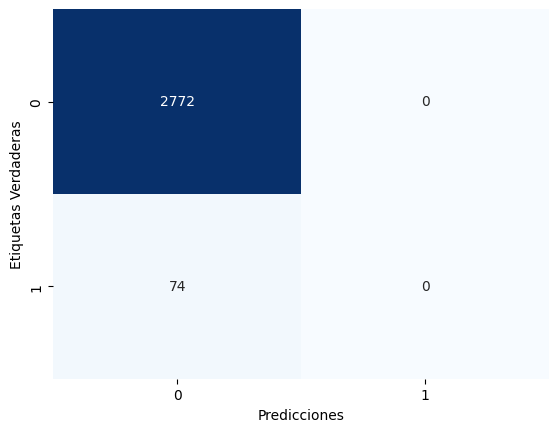

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(etiqueta, y_predict)

# Imprimir la matriz de confusión de manera formateada
print("Matriz de Confusión:")
print(conf_matrix)

# Mostrar la matriz de confusión como un gráfico usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()